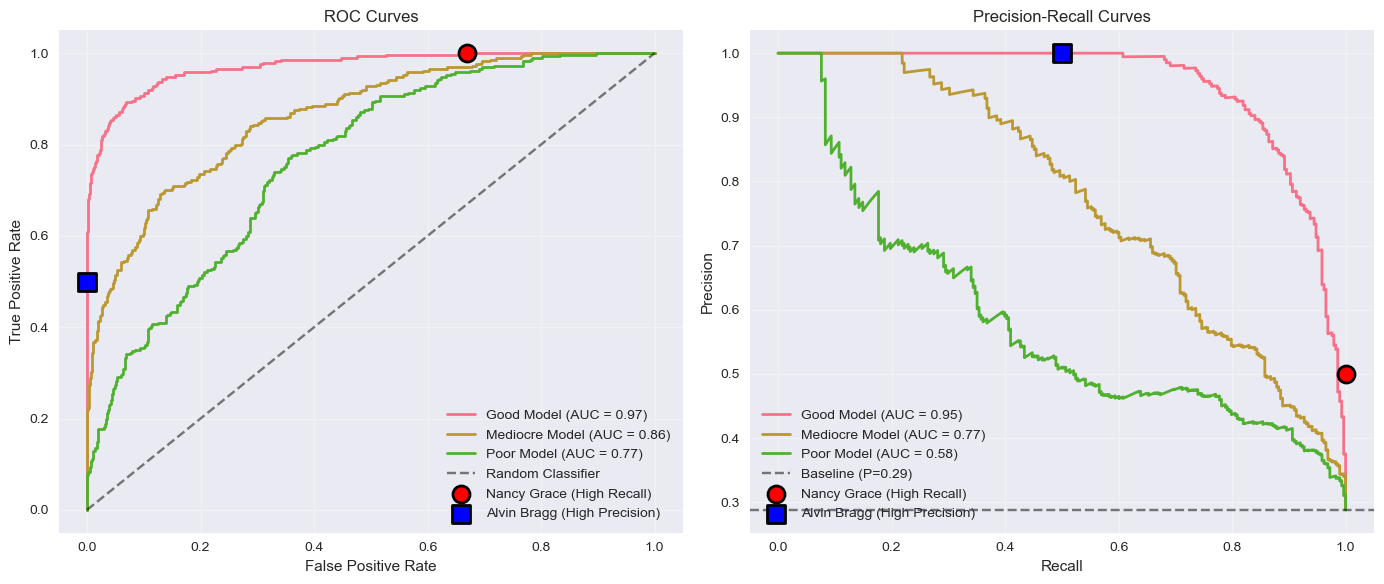

Model Performance Summary:
Nancy Grace Model: Precision = 50%, Recall = 100%
Alvin Bragg Model: Precision = 100%, Recall = 50%
\nNancy Grace catches all high-risk defendants but detains many innocent ones.
Alvin Bragg only detains defendants who are truly high-risk but misses half of them.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12

# Generate synthetic data for demonstration
np.random.seed(42)
n_samples = 1000

# Create three different models with varying performance
y_true = np.random.binomial(1, 0.3, n_samples)  # 30% positive class

# Model 1: Good model
y_scores_good = np.random.beta(2, 5, n_samples)
y_scores_good[y_true == 1] += np.random.beta(3, 2, sum(y_true))

# Model 2: Mediocre model  
y_scores_med = np.random.beta(1.5, 3, n_samples)
y_scores_med[y_true == 1] += np.random.beta(2, 3, sum(y_true))

# Model 3: Poor model
y_scores_poor = np.random.beta(1, 2, n_samples)
y_scores_poor[y_true == 1] += np.random.beta(1.5, 4, sum(y_true))

# Normalize scores to [0,1]
for scores in [y_scores_good, y_scores_med, y_scores_poor]:
    scores /= scores.max()

# Calculate ROC curves
fpr_good, tpr_good, _ = roc_curve(y_true, y_scores_good)
fpr_med, tpr_med, _ = roc_curve(y_true, y_scores_med)
fpr_poor, tpr_poor, _ = roc_curve(y_true, y_scores_poor)

# Calculate PR curves
precision_good, recall_good, _ = precision_recall_curve(y_true, y_scores_good)
precision_med, recall_med, _ = precision_recall_curve(y_true, y_scores_med)
precision_poor, recall_poor, _ = precision_recall_curve(y_true, y_scores_poor)

# Nancy Grace and Alvin Bragg model points
nancy_grace = {'precision': 0.50, 'recall': 1.0, 'fpr': 0.67, 'tpr': 1.0}  # High recall, catches everyone
alvin_bragg = {'precision': 1.0, 'recall': 0.50, 'fpr': 0.0, 'tpr': 0.50}  # High precision, very selective

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve
ax1.plot(fpr_good, tpr_good, linewidth=2, label=f'Good Model (AUC = {auc(fpr_good, tpr_good):.2f})')
ax1.plot(fpr_med, tpr_med, linewidth=2, label=f'Mediocre Model (AUC = {auc(fpr_med, tpr_med):.2f})')
ax1.plot(fpr_poor, tpr_poor, linewidth=2, label=f'Poor Model (AUC = {auc(fpr_poor, tpr_poor):.2f})')
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')

# Add Nancy Grace and Alvin Bragg points
ax1.scatter(nancy_grace['fpr'], nancy_grace['tpr'], s=150, c='red', marker='o', 
           edgecolors='black', linewidth=2, label='Nancy Grace (High Recall)', zorder=5)
ax1.scatter(alvin_bragg['fpr'], alvin_bragg['tpr'], s=150, c='blue', marker='s', 
           edgecolors='black', linewidth=2, label='Alvin Bragg (High Precision)', zorder=5)

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
baseline = np.mean(y_true)
ax2.plot(recall_good, precision_good, linewidth=2, label=f'Good Model (AUC = {auc(recall_good, precision_good):.2f})')
ax2.plot(recall_med, precision_med, linewidth=2, label=f'Mediocre Model (AUC = {auc(recall_med, precision_med):.2f})')
ax2.plot(recall_poor, precision_poor, linewidth=2, label=f'Poor Model (AUC = {auc(recall_poor, precision_poor):.2f})')
ax2.axhline(y=baseline, color='k', linestyle='--', alpha=0.5, label=f'Baseline (P={baseline:.2f})')

# Add Nancy Grace and Alvin Bragg points
ax2.scatter(nancy_grace['recall'], nancy_grace['precision'], s=150, c='red', marker='o', 
           edgecolors='black', linewidth=2, label='Nancy Grace (High Recall)', zorder=5)
ax2.scatter(alvin_bragg['recall'], alvin_bragg['precision'], s=150, c='blue', marker='s', 
           edgecolors='black', linewidth=2, label='Alvin Bragg (High Precision)', zorder=5)

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves')
ax2.legend(loc='lower left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Model Performance Summary:")
print(f"Nancy Grace Model: Precision = {nancy_grace['precision']:.0%}, Recall = {nancy_grace['recall']:.0%}")
print(f"Alvin Bragg Model: Precision = {alvin_bragg['precision']:.0%}, Recall = {alvin_bragg['recall']:.0%}")
print(f"\\nNancy Grace catches all high-risk defendants but detains many innocent ones.")
print(f"Alvin Bragg only detains defendants who are truly high-risk but misses half of them.")